Autor: Filip Kłos 20453

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
print(tf.__version__)

2.18.0


In [15]:
observations=10000
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))
inputs = np.column_stack((xs,zs))
print(inputs.shape)

(10000, 2)


In [16]:
noise = np.random.uniform(low=-1,high=1,size=(observations,1))
targets = 13*xs - 7*zs -12 + noise
np.savez('TF_dataset',inputs=inputs,targets=targets)
print(targets.shape)

(10000, 1)


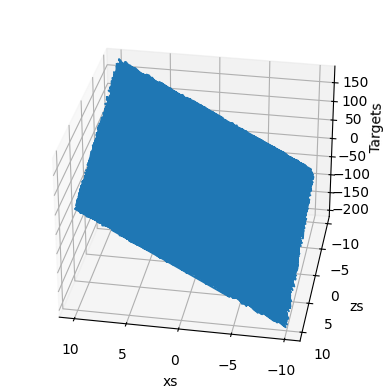

In [17]:
targets = targets.reshape(observations,)
xs = xs.reshape(observations,)
zs = zs.reshape(observations,)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(xs, zs, targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')

ax.view_init(azim=100)
plt.show()


In [19]:
init_range = 0.1
weights = np.random.uniform(low=-init_range,high=init_range,size=(2,1))
biases = np.random.uniform(low=-init_range,high=init_range,size=1)
print(weights,biases)

[[0.03239252]
 [0.03655149]] [-0.0047583]


In [20]:
targets = targets.reshape(observations,1)
eta = 0.001
for i in range (100):
  outputs = np.dot(inputs,weights) + biases
  deltas = outputs - targets

  loss = np.sum(deltas ** 2) / 2 / observations
  print(loss)

  deltas_scaled = deltas / observations
  weights = weights - eta * np.dot(inputs.T,deltas_scaled)
  biases = biases - eta * np.sum(deltas_scaled)

3697.267302749984
3460.2914766584267
3238.789515700934
3031.750295184275
2838.2287724114
2657.34166724118
2488.26342503087
2330.2224434977024
2182.497546243496
2044.4146868145615
1915.343868223886
1794.696263848211
1681.9215265338437
1576.505273605995
1477.966736281072
1385.8565627333924
1299.7547647706208
1219.2687987290951
1144.0317718141391
1073.700765684219
1007.9552696140412
946.4957160728723
889.0421120227566
835.3327596790795
785.1230608850648
738.18439963418
694.3030976318073
653.2794381215459
614.9267535136821
579.0705726451207
545.5478237727472
514.2060896570396
484.9029113309355
457.5051373715628
431.8883157005012
407.9361251326923
385.5398440758454
364.597853952043
345.01517507200015
326.70303284078943
309.57845231252037
293.56387924105564
278.5868258949747
264.57954001820616
251.4786954235516
239.22510280521325
227.76343944886364
217.0419966041727
207.01244336544218
197.62960598145403
188.85126158615887
180.6379454077458
172.95277057523444
165.76125969930789
159.0311874579

In [21]:
print (weights,biases)

[[12.57329717]
 [-6.77039111]] [-1.17106325]


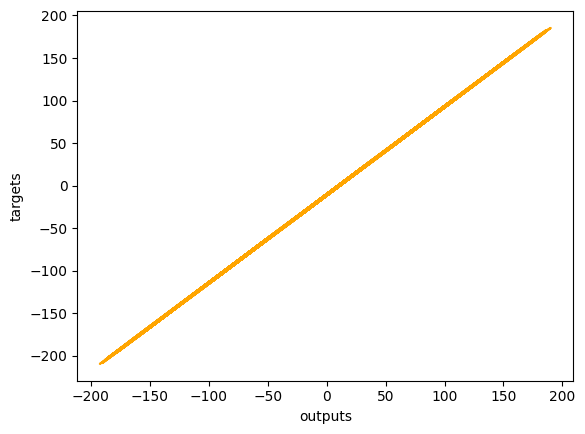

In [22]:
plt.plot(outputs,targets,color='orange')
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()